# Table of Contents
 <p><div class="lev1 toc-item"><a href="#正規分布で中心極限定理を試してみる" data-toc-modified-id="正規分布で中心極限定理を試してみる-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>正規分布で中心極限定理を試してみる</a></div><div class="lev1 toc-item"><a href="#指数分布で中心極限定理を試してみる" data-toc-modified-id="指数分布で中心極限定理を試してみる-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>指数分布で中心極限定理を試してみる</a></div><div class="lev1 toc-item"><a href="#PyMCを使った乱数生成" data-toc-modified-id="PyMCを使った乱数生成-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>PyMCを使った乱数生成</a></div><div class="lev2 toc-item"><a href="#指数分布に従う乱数を作成" data-toc-modified-id="指数分布に従う乱数を作成-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>指数分布に従う乱数を作成</a></div><div class="lev2 toc-item"><a href="#正規分布に従う乱数を作成" data-toc-modified-id="正規分布に従う乱数を作成-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>正規分布に従う乱数を作成</a></div><div class="lev2 toc-item"><a href="#中心極限定理を試してみる" data-toc-modified-id="中心極限定理を試してみる-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>中心極限定理を試してみる</a></div><div class="lev3 toc-item"><a href="#正規分布" data-toc-modified-id="正規分布-331"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>正規分布</a></div><div class="lev3 toc-item"><a href="#指数分布" data-toc-modified-id="指数分布-332"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>指数分布</a></div>

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import scipy.stats as st
import seaborn as sns

In [3]:
plt.rcParams['font.family'] = 'IPAPGothic' # 日本語を使うため（環境によっては不要または変更の必要あり）

In [4]:
# サンプル用パラメータ
n = 10000
sample_size = 10000

# サンプルごとの平均算出する関数
def choice_mean(sample):
    mean = np.mean(np.random.choice(sample,100,replace=False))
    return [mean]

# 平均のヒストグラムを描画する関数
def plot_mean(stats,dist_name=""):
    mu = stats
    bins = 40

    # 標本平均のヒストグラム
    plt.figure(figsize=(7,5))
    plt.hist(mu, bins=bins, normed=True,color="indianred")
    plt.title("%s"%(dist_name))
    plt.show()

def plot_dist(data, bins, title =""):
    plt.figure(figsize=(7,5))
    plt.title(title)
    plt.hist(data, bins, normed=True)
    plt.show()

# 正規分布で中心極限定理を試してみる

- 正規分布f(x) = $\dfrac{1}{\sqrt{2π}σ}e^{\dfrac{-(x-μ)^2}{2σ^2}}$  
- μ=50、σ=10（平均50、分散100) とする
- この正規分布から、100の標本を取り出して平均を考えると、  
平均50,分散$\dfrac{σ^2}{n}=\dfrac{100}{100}$=1の正規分布に従うはず

→　試してみる

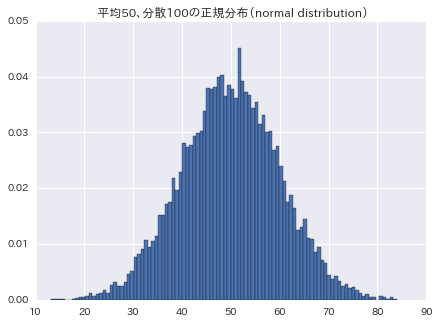

In [5]:
μ = 50
σ = 10  
x = np.random.normal(μ,σ, size=sample_size)
plot_dist(x, 100, " 平均50、分散100の正規分布（normal distribution）")

平均μ、分散σの正規分布からsample_choice個を抽出し、その平均の分布を描画

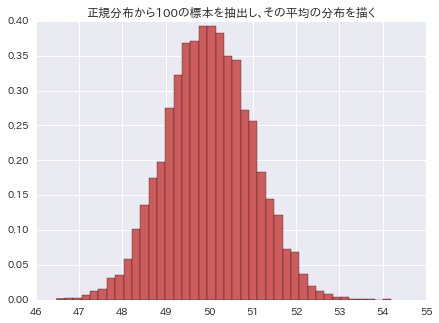

In [6]:
μ = 50
σ = 10  
sample_choice=100
stats = np.array([choice_mean(np.random.normal(μ,σ, size=sample_size)) for i in range(n)])
plot_mean(stats, dist_name="正規分布から100の標本を抽出し、その平均の分布を描く")

***

# 指数分布で中心極限定理を試してみる

- 指数分布f(x) = λ $e^{-λx}$  
    - 平均$\dfrac{1}{λ}$、分散$\dfrac{1}{λ^2}$
- λ=0.1とする
    - 平均10,分散100
- この指数分布から、100の標本を取り出して平均を考えると、  
平均10,分散$\dfrac{10^2}{100}$=1の正規分布に従うはず

→　試してみる

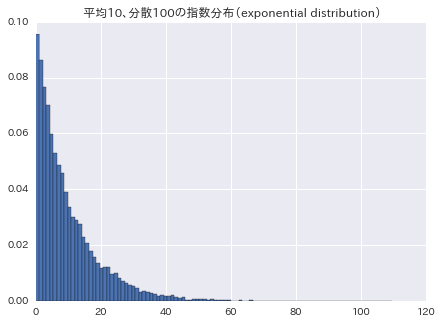

In [7]:
lam = 0.1  
x = np.random.exponential(1./lam, size=sample_size)
plot_dist(x, 100, " 平均10、分散100の指数分布（exponential distribution）")

平均lamの指数分布からsample_choice個を抽出し、その平均を描画

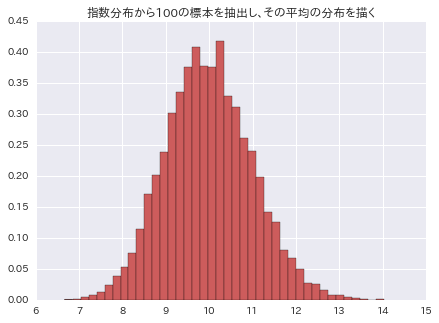

In [8]:
lam = 0.1  
sample_choice=100
stats = np.array([choice_mean(np.random.exponential(1./lam, size=sample_size)) for i in range(n)])
plot_mean(stats, dist_name="指数分布から100の標本を抽出し、その平均の分布を描く")

--- 

# PyMCを使った乱数生成

PyMCでは、

```
Name = pymc.Exponential("Name",beta,size=sample_size)
Name.random()
```
のようにして、`sample_size`個の指数分布の乱数が作成可能

***

Exponentialの部分を変更することで、他の確率分布に従う乱数を生成できる。

|確率分布|確率分布名（引数）|引数の条件|平均,分散|
|:---|:---|:---|:---|
|指数分布|Exponential("Name",beta)|beta>0|$\frac{1}{beta},\frac{1}{beta^2}$|
|正規分布|Normal("Name",mu,tau)|tau>0|mu,$\frac{1}{tau^2}$|
|ポアソン分布|Poisson("Name",mu)|mu$\geq$0|mu,mu|
|二項分布|Binomial("Name",n,p)|nは自然数,0$\leq p \leq 1$|np,np(1-p)|
|一様分布|Discrete_uniform("Name",lower,upper)|upper>lower|$\frac{lower+upper}{2},\frac{(lower-upper)^2}{12}$|
|ベータ分布|Beta("Name",alpha,beta)|alpha>0,beta>0|$\frac{alpha}{alpha+beta},\frac{alpha* beta}{(alpha+beta)^2(alpha+beta+1)}$|
|ガンマ分布|Gamma("Name",alpha,beta)|alpha>0,beta>0|$\frac{alpha}{beta},\frac{alpha}{beta^2}$|
|逆ガンマ分布|Inverse_gamma("Name",alpha,beta)|alpha>0,beta>0|$\frac{beta}{alpha-1}$for alpha>1,$\frac{beta^2}{(alpha-1)^2 (alpha-2)}$for alpha>2|

詳細やその他の確率分布は[公式ドキュメント](https://pymc-devs.github.io/pymc/distributions.html)参照


In [9]:
import pymc as pm

***

## 指数分布に従う乱数を作成

In [11]:
lam = 0.1 
sample_size=10000
Expo_r10 = pm.Exponential("Expo", 0.1,size=10)
Expo_r10000 = pm.Exponential("Expo", 0.1,size=10000)

In [12]:
np.size(Expo_r10000.random())

10000

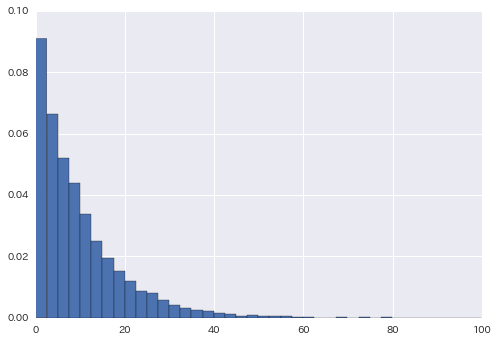

In [13]:
plt.hist(Expo_r10000.random(),bins=40,normed=True)
print()

***

## 正規分布に従う乱数を作成

In [14]:
Normal_rand10 = pm.Normal("Normal",50,1/10,size=10)
Normal_rand10000 = pm.Normal("Normal",50,1/10,size=1000)

***

## 中心極限定理を試してみる
### 正規分布

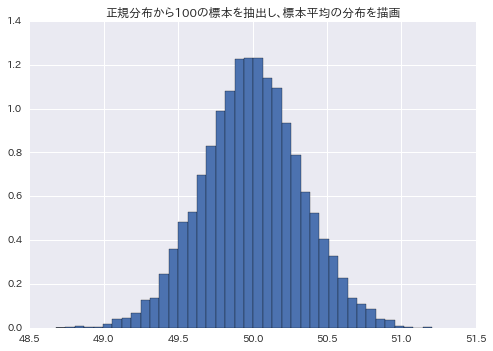

In [15]:
plt.hist(np.array([np.mean(np.random.choice(Normal_rand10000.random(),100)) for i in range(10000)]),bins=40,normed=True)
plt.title("正規分布から100の標本を抽出し、標本平均の分布を描画")

***

### 指数分布

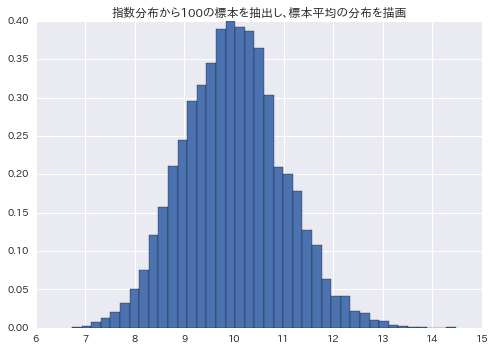

In [16]:
plt.hist(np.array([np.mean(np.random.choice(Expo_r10000.random(),100)) for i in range(10000)]),bins=40,normed=True)
plt.title("指数分布から100の標本を抽出し、標本平均の分布を描画")